# Solving the n-Queens Problem using Local Search

Student Name: Leilani Guzman

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the fontsize to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


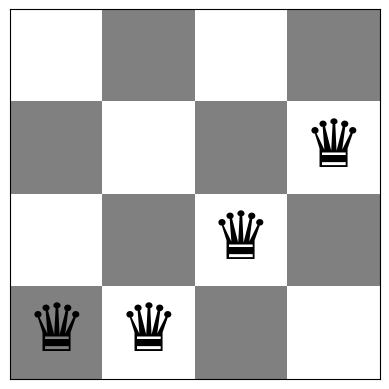

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [157]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


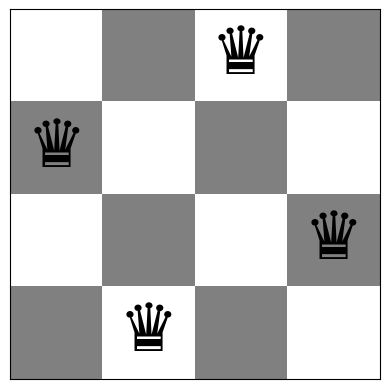

In [158]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [159]:
# Code and description go here
def steepest_ascend(board):
    best = board
    best_conflicts = conflicts(best)

    while True:
        best_move = best
        # For each possible position of moving the queen in a column up or down (queen in a column can only move up or down)
        for col in range(len(board)):
            for row in range(len(board)):
                # Move the queen to new position
                if best[col] == row:
                    continue
                new_board = best.copy()
                new_board[col] = row
                # If successor has fewer conflicts than best, then reassign best
                if conflicts(new_board) < conflicts(best_move):
                    best_move = new_board
        
        if conflicts(best_move) >= best_conflicts:
            # No better moves
            break
        
        best = best_move
        best_conflicts = conflicts(best)

    return best

Board with 21 conflicts.


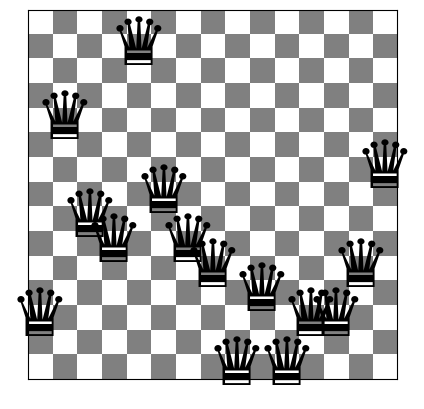

Board with 1 conflicts.


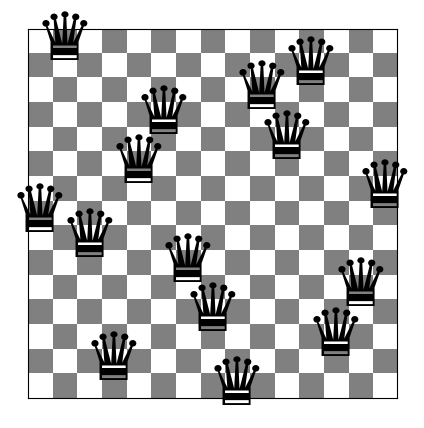

In [160]:
board = random_board(15)
show_board(board)

best_board = steepest_ascend(board)
show_board(best_board)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [161]:
# Modify steepest ascend so it randomly chooses between successors with equal number of conflicts
import random

def stochastic_climbing_1(board):
    best = board
    best_conflicts = conflicts(best)

    # Generate all uphill moves
    while True:
        uphill_moves = []
        for col in range(len(board)):
            for row in range(len(board)):
                if best[col] != row:
                    new_board = best.copy()
                    new_board[col] = row
                    if conflicts(new_board) < best_conflicts:
                        uphill_moves.append(new_board)

        # If there are no uphill moves, then return best
        if len(uphill_moves) == 0:
            break
        
        # Randomly pick from uphill moves
        best = random.choice(uphill_moves)
        best_conflicts = conflicts(best)
    
    return best

Board with 11 conflicts.


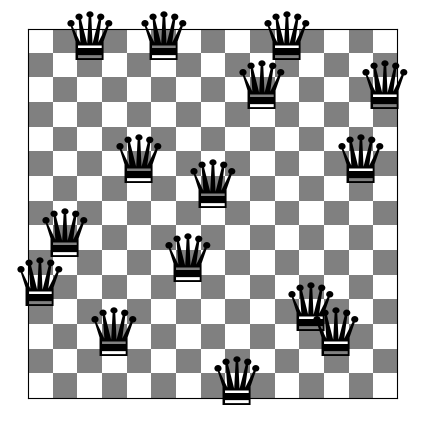

Board with 1 conflicts.


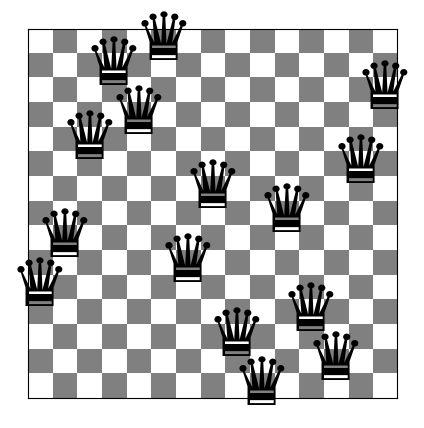

In [162]:
board = random_board(15)
show_board(board)

best_board = stochastic_climbing_1(board)
show_board(best_board)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [163]:
def stochastic_climbing_2(board):
    best = board
    best_conflicts = conflicts(best)

    # For each possible position of moving the queen in a column up or down (queen in a column can only move up or down)
    for col in range(len(board)):
        original_row = best[col]
        new_row = original_row
        while original_row == new_row:
            new_row = np.random.randint(0, len(board))
        # Move the queen to new position
        new_board = best.copy()
        new_board[col] = new_row
        # If successor has fewer conflicts than best, then reassign best
        if conflicts(new_board) < best_conflicts:
            best = new_board
            best_conflicts = conflicts(best)
    
    return best

Board with 15 conflicts.


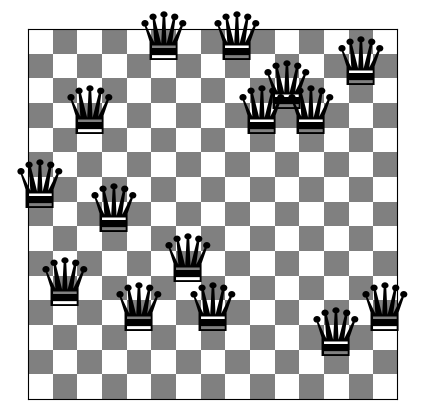

Board with 8 conflicts.


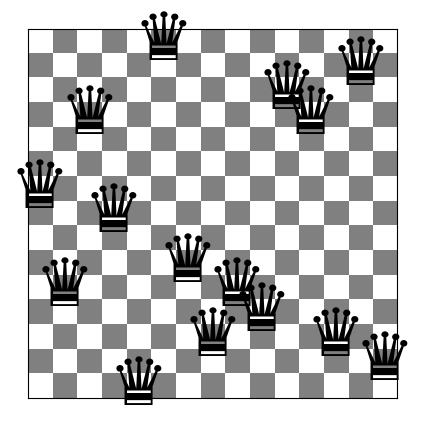

In [164]:
board = random_board(15)
show_board(board)

best_board = stochastic_climbing_2(board)
show_board(best_board)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Steepest Ascend Climbing: 0 conflicts.
Board with 0 conflicts.


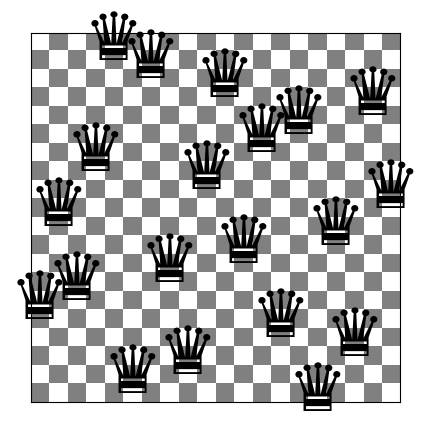

Stochastic Hill Climbing 1: 1 conflicts.
Board with 1 conflicts.


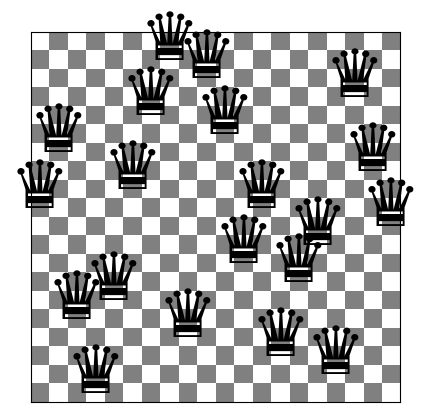

Stochastic Hill Climbing 2: 7 conflicts.
Board with 7 conflicts.


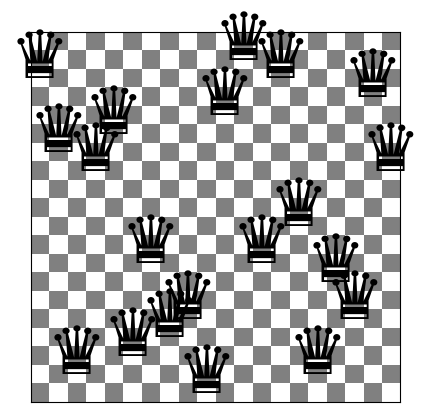

In [165]:
# Code and description go here

board = random_board(20)
best_board = steepest_ascend(board)
for _ in range(100):
    board = random_board(20)
    new_board = steepest_ascend(board)
    if conflicts(new_board) < conflicts(best_board):
        best_board = new_board


print(f"Steepest Ascend Climbing: {conflicts(best_board)} conflicts.")
show_board(best_board)

board = random_board(20)
best_board = stochastic_climbing_1(board)
for _ in range(100):
    board = random_board(20)
    new_board = stochastic_climbing_1(board)
    if conflicts(new_board) < conflicts(best_board):
        best_board = new_board

print(f"Stochastic Hill Climbing 1: {conflicts(best_board)} conflicts.")
show_board(best_board)

board = random_board(20)
best_board = stochastic_climbing_2(board)
for _ in range(100):
    board = random_board(20)
    new_board = stochastic_climbing_2(board)
    if conflicts(new_board) < conflicts(best_board):
        best_board = new_board

print(f"Stochastic Hill Climbing 2: {conflicts(best_board)} conflicts.")
show_board(best_board)

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

In [172]:
def schedule(t, t_0):
    return t_0 /(t+1)

def simulated_annealing(board, temp):
    best = board
    best_conflicts = conflicts(best)

    # For each possible position of moving the queen in a column up or down (queen in a column can only move up or down)
    t = 1
    while True:
        T = schedule(t, temp)
        if int(T) < .000001:
            return best
        # Move the queen to new position
        new_board = best.copy()
        col = np.random.randint(0, len(board))
        new_board[col] = np.random.randint(0, len(board))
        delta_E = best_conflicts - conflicts(new_board) 
        if delta_E > 0:
            best = new_board
            best_conflicts = conflicts(best)
        else:
            if np.random.uniform(0,1) >= np.exp(-delta_E/T):
                best = new_board
                best_conflicts = conflicts(best)
        t += 1


Original Board
Board with 21 conflicts.


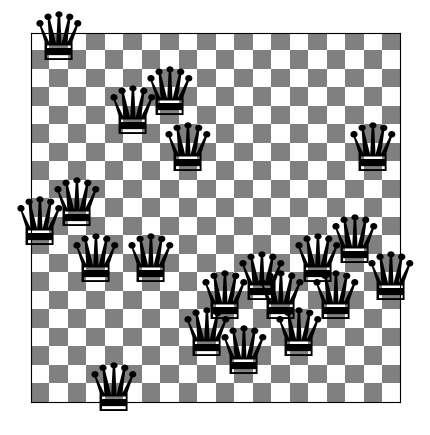

Best Board
Board with 2 conflicts.


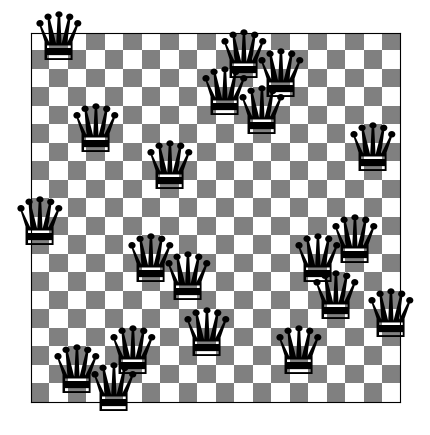

In [174]:
board = random_board(20)
print('Original Board')
show_board(board)

temp = 20000
best_board = simulated_annealing(board, temp)
print('Best Board')
show_board(best_board)

## Task 6: Compare Performance [10 Points]

Use runtime and objective function value to compare the algorithms.

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [175]:
# Code, results, charts and discussion go here
import time

steepest_ascend_conflicts = []
steepest_ascend_runtime = []
stochastic_climbing_1_conflicts = []
stochastic_climbing_1_runtime = []
stochastic_climbing_2_conflicts = []
stochastic_climbing_2_runtime = []
simulated_annealing_conflicts = []
simulated_annealing_runtime = []

board_sizes = [10,15,20,25]

for size in board_sizes:
    conflicts_per_board = []
    runtimes = []

    for _ in range(50):
        board = random_board(size)
        start_time = time.time()
        best_board = steepest_ascend(board)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))
    
    steepest_ascend_conflicts.append(np.mean(conflicts_per_board))
    steepest_ascend_runtime.append(np.mean(runtimes))

    conflicts_per_board = []
    runtimes = []
    for _ in range(50):
        board = random_board(size)

        start_time = time.time()
        best_board = stochastic_climbing_1(board)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))
    
    stochastic_climbing_1_conflicts.append(np.mean(conflicts_per_board))
    stochastic_climbing_1_runtime.append(np.mean(runtimes))

    conflicts_per_board = []
    runtimes = []
    for _ in range(50):
        board = random_board(size)
        start_time = time.time()
        best_board = stochastic_climbing_2(board)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))

    stochastic_climbing_2_conflicts.append(np.mean(conflicts_per_board))
    stochastic_climbing_2_runtime.append(np.mean(runtimes))

    conflicts_per_board = []
    runtimes = []
    for _ in range(50):
        board = random_board(size)
        start_time = time.time()
        best_board = simulated_annealing(board, 20000)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))

    simulated_annealing_conflicts.append(np.mean(conflicts_per_board))
    simulated_annealing_runtime.append(np.mean(runtimes))


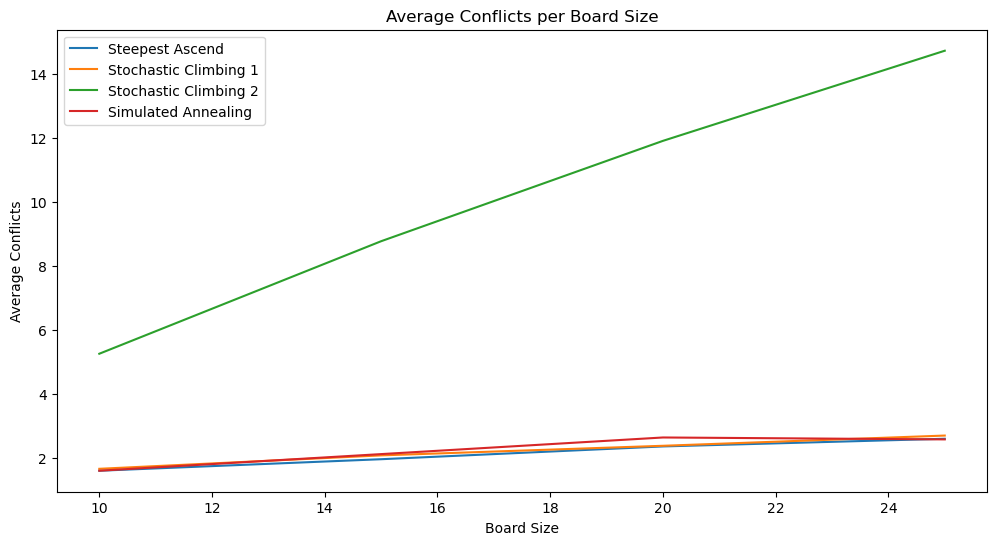

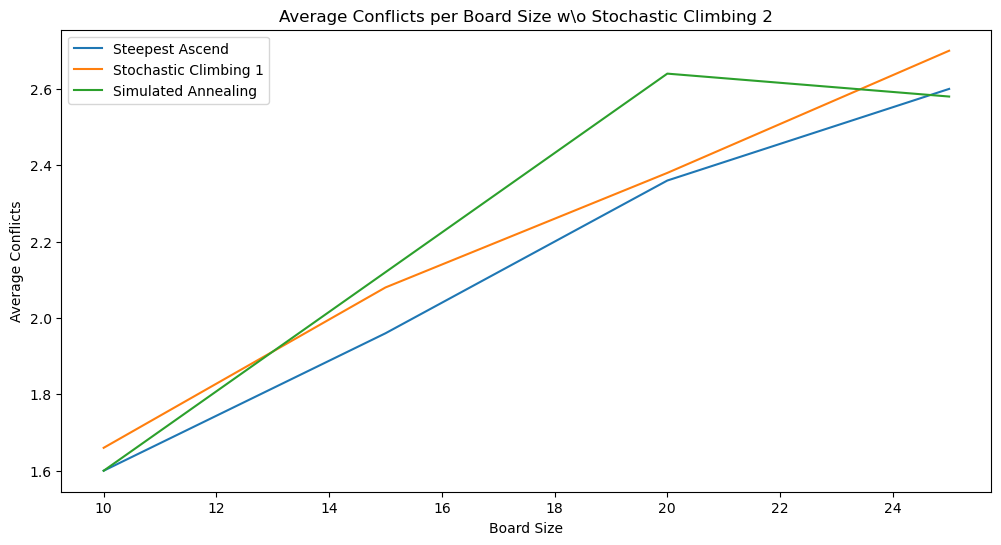

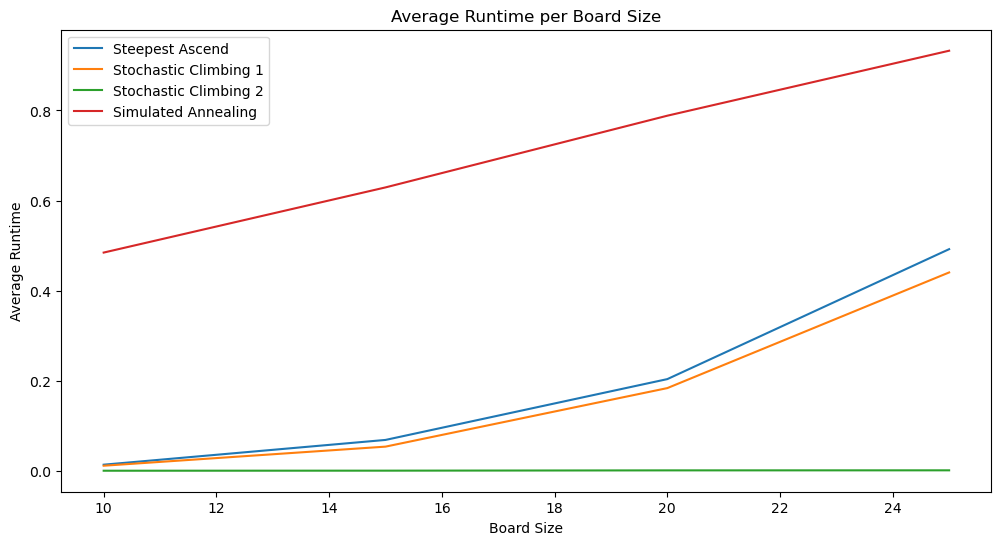

In [184]:
# Plot the results, zoom in so the differences are visible
plt.figure(figsize=(12,6))
plt.plot(board_sizes, steepest_ascend_conflicts, label='Steepest Ascend')
plt.plot(board_sizes, stochastic_climbing_1_conflicts, label='Stochastic Climbing 1')
plt.plot(board_sizes, stochastic_climbing_2_conflicts, label='Stochastic Climbing 2')
plt.plot(board_sizes, simulated_annealing_conflicts, label='Simulated Annealing')
plt.xlabel('Board Size')
plt.ylabel('Average Conflicts')
plt.title('Average Conflicts per Board Size')
plt.legend()

# Plot the average conflicts per board size without stochastic climbing 2, zoomed in version
plt.figure(figsize=(12,6))
plt.plot(board_sizes, steepest_ascend_conflicts, label='Steepest Ascend')
plt.plot(board_sizes, stochastic_climbing_1_conflicts, label='Stochastic Climbing 1')
plt.plot(board_sizes, simulated_annealing_conflicts, label='Simulated Annealing')
plt.xlabel('Board Size')
plt.ylabel('Average Conflicts')
plt.title('Average Conflicts per Board Size w\o Stochastic Climbing 2')
plt.legend()


plt.figure(figsize=(12,6))
plt.plot(board_sizes, steepest_ascend_runtime, label='Steepest Ascend')
plt.plot(board_sizes, stochastic_climbing_1_runtime, label='Stochastic Climbing 1')
plt.plot(board_sizes, stochastic_climbing_2_runtime, label='Stochastic Climbing 2')
plt.plot(board_sizes, simulated_annealing_runtime, label='Simulated Annealing')
plt.xlabel('Board Size')
plt.ylabel('Average Runtime')
plt.title('Average Runtime per Board Size')
plt.legend()
plt.show()

## Graduate student advanced task: Exploring other Local Moves [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Implement a few different local moves. Implement:

* moving a queen only one square at a time
* switching two columns
* more moves which move more than one queen at a time.

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [185]:

def stochastic_climbing_3(board):
    best = board
    best_conflicts = conflicts(best)

    # For each possible position of moving the queen in a column up or down (queen in a column can only move up or down)
    for col in range(len(board)):
        original_row = board[col]
        for moves in [-1,1]:
            row = (original_row + moves) % len(best)
            if row != original_row:
                # Move the queen to new position
                new_board = best.copy()
                new_board[col] = row
                # If successor has fewer conflicts than best, then reassign best
                if conflicts(new_board) <= best_conflicts:
                    best = new_board
                    best_conflicts = conflicts(best)
    
    return best

def stochastic_climbing_4(board):
    best = board
    best_conflicts = conflicts(best)
    tries = 0

    while tries < len(board) * 2:
        # Randomly choose two different columns
        col1, col2 = random.sample(range(len(board)), 2)

        # Exchange the positions of queens in col1 and col2
        new_board = best.copy()
        new_board[col1], new_board[col2] = new_board[col2], new_board[col1]

        new_conflicts = conflicts(new_board)

        # If successor has fewer conflicts than best, then reassign best
        if new_conflicts < best_conflicts:
            best = new_board
            best_conflicts = new_conflicts
            tries = 0
        else:
            tries += 1

    return best


Board with 16 conflicts.


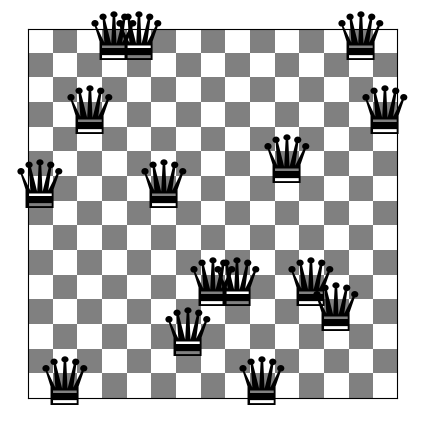

Stochastic Hill Climbing 3: 4 conflicts.
Stochastic Hill Climbing 4: 11 conflicts.


In [191]:
board = random_board(15)
show_board(board)
best_board = stochastic_climbing_3(board)
print(f"Stochastic Hill Climbing 3: {conflicts(best_board)} conflicts.")

best_board = stochastic_climbing_4(board)
print(f"Stochastic Hill Climbing 4: {conflicts(best_board)} conflicts.")


## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here